In [1]:
from model.tda_model import PCSamplingProcessor, Pooling
from ModelNet import ModelNet40
from torch.utils.data import DataLoader

train_loader = DataLoader(ModelNet40(partition='test', num_points=1024), num_workers=4,
                              batch_size=100, shuffle=True, drop_last=True)
for batch_idx, (data, label) in enumerate(train_loader):
    data = data
    print(f"batch_idx: {batch_idx}  | data shape: {data.shape} | ;lable shape: {label.shape}")
    break
data.shape

batch_idx: 0  | data shape: torch.Size([100, 1024, 3]) | ;lable shape: torch.Size([100, 1])


torch.Size([100, 1024, 3])

In [10]:
random_int = 23
pcs = PCSamplingProcessor(512, 30).cuda()
sampled_xyz, knn_xyz = pcs(data[random_int].reshape(1, 1024, 3))
jjjj = knn_xyz.reshape(512, 30, 6)
knn_xyz1 = knn_xyz.permute(0, 3, 1, 2)
pooling = Pooling(6).cuda()
j2j2 = jjjj.permute(0, 2, 1)
j2j2 = pooling(j2j2)#.reshape(512, 6)
pooling_xyz = pooling(knn_xyz1) # b, d, n
pooling_xyz = pooling_xyz.permute(0,2, 1)

torch.Size([512, 6, 30])


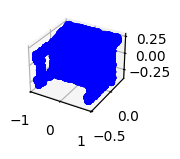

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a new figure for the 3D plot
fig = plt.figure()
ax = fig.add_subplot(321, projection='3d')
points = j2j2.cpu()
# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o')


# Show the plot
plt.show()


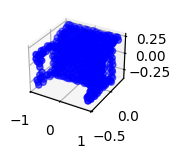

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a new figure for the 3D plot
fig = plt.figure()
ax = fig.add_subplot(321, projection='3d')
points = pooling_xyz.cpu()
# Plot the points
ax.scatter(points[:, :, 3], points[:,:, 4], points[:,:, 5], c='b', marker='o')


# Show the plot
plt.show()


In [3]:
pooling_xyz.permute(0, 2, 1)[:, 3:, :].shape

torch.Size([1, 3, 512])

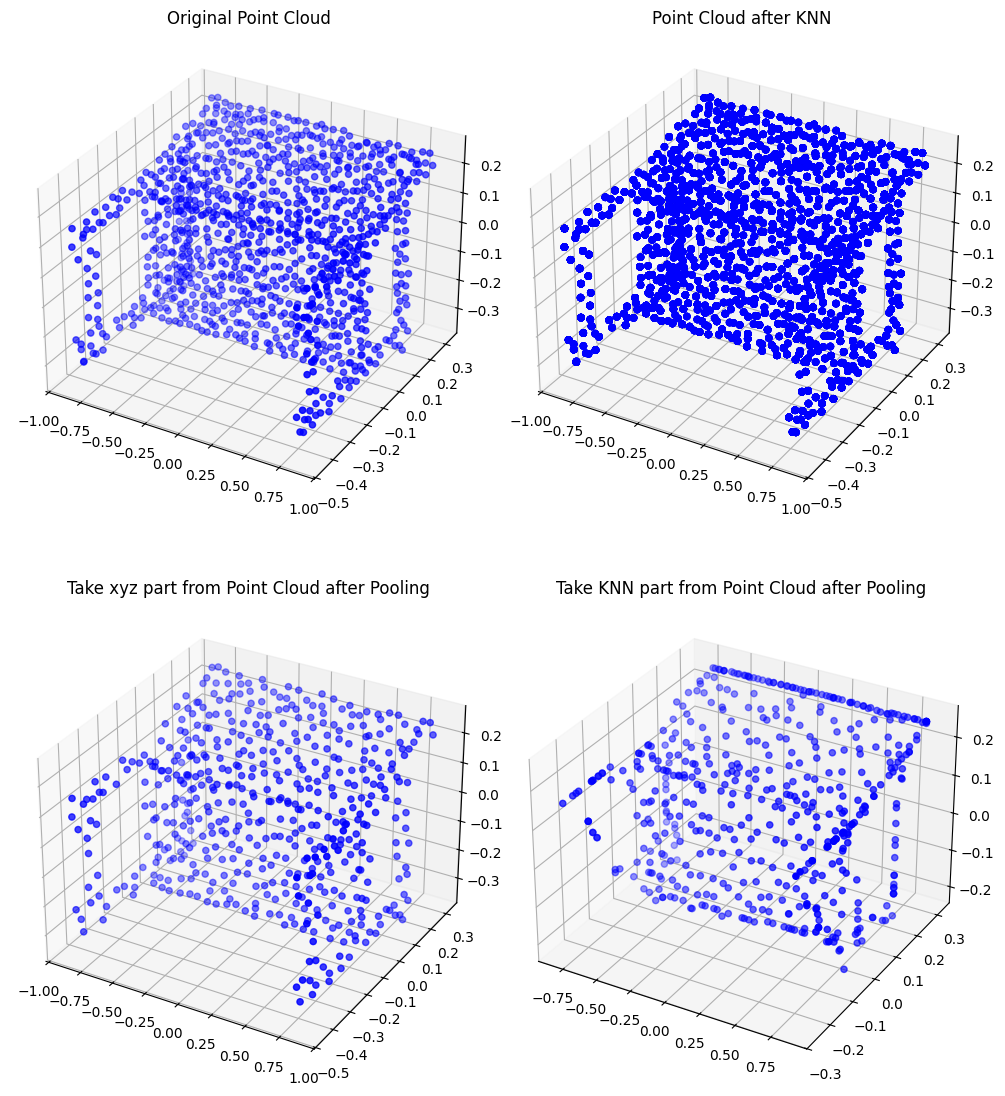

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create some random 3D data points
plot_data = []
plot_data.append(data[random_int].reshape(1, 1024, 3).cpu())
# plot_data.append(sampled_xyz.cpu())
# # print(jjjj.shape)
jjjjjjjjj = jjjj.reshape(-1, 3).unsqueeze(0).cpu()
# print(jjjjjjjjj.shape)

plot_data.append(jjjjjjjjj[:, :, :3].cpu())
kkk = pooling_xyz[:, :, :3]#.permute(0, 1, 2)
xxx = pooling_xyz[:, :, 3:]
plot_data.append(xxx.cpu().detach())
plot_data.append(kkk.cpu().detach())

# plot_data.append(jjjj[:, 1, :3].reshape(1, 512, 3).cpu())


# Create a new figure
fig = plt.figure(figsize=(10, 12))

# Create a 3x2 grid of subplots and plot 3D scatter plots
for i in range(0, 4):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.scatter(plot_data[i][0, :, 0], plot_data[i][0, :, 1], plot_data[i][0, :, 2], c='b', marker='o')
    # ax.scatter(plot_data[i, :, 0], plot_data[i, :, 1], plot_data[i, :, 2], c='b', marker='o')
    # ax.set_title(f'Subplot {i}')
    if i == 0:
        ax.set_title(f'Original Point Cloud')
    if i == 1:
        ax.set_title(f'Point Cloud after KNN')
    if i == 3:
        ax.set_title(f'Take KNN part from Point Cloud after Pooling')
    if i == 2:
        ax.set_title(f'Take xyz part from Point Cloud after Pooling')
    # ax.set_xlabel('X Label')
    # ax.set_ylabel('Y Label')
    # ax.set_zlabel('Z Label')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


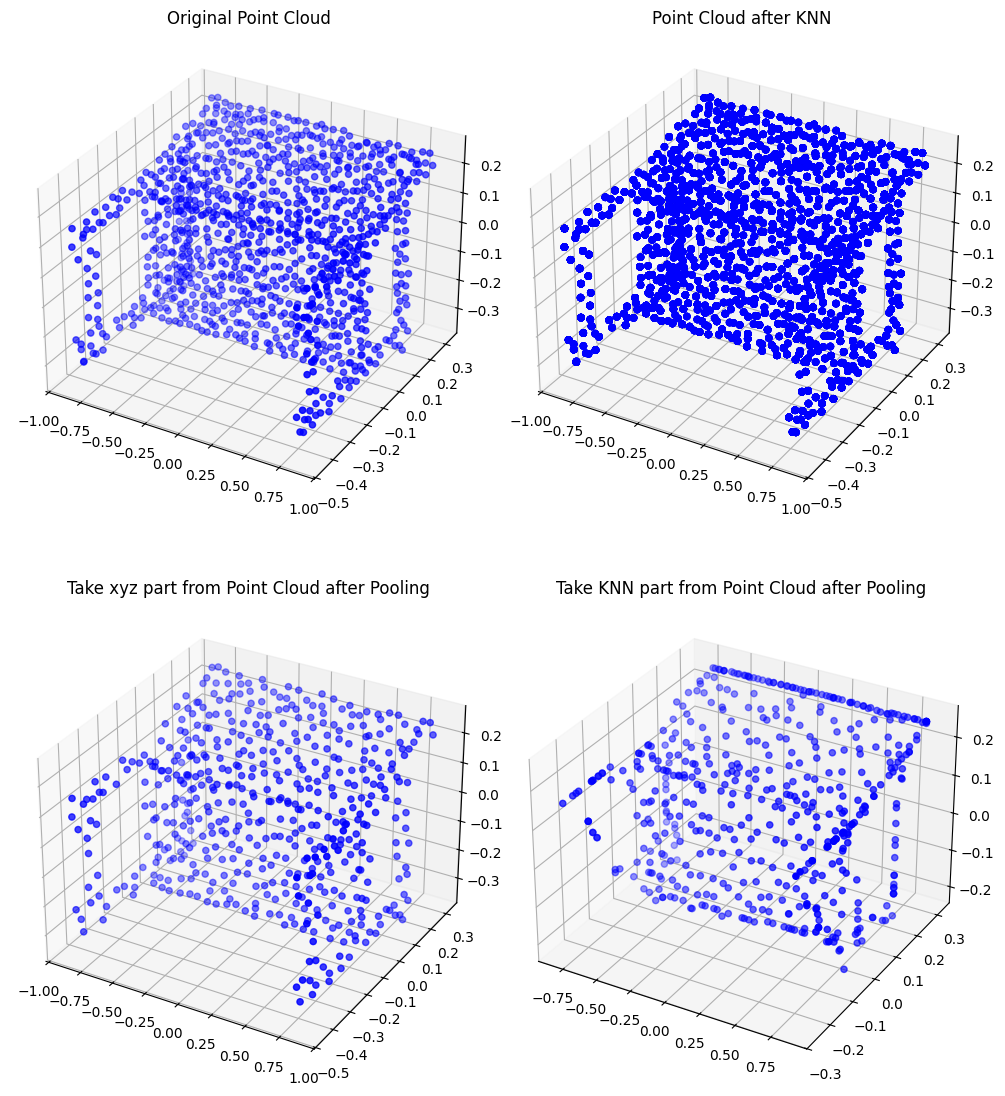

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create some random 3D data points
plot_data = []
plot_data.append(data[random_int].reshape(1, 1024, 3).cpu())
# plot_data.append(sampled_xyz.cpu())
# # print(jjjj.shape)
jjjjjjjjj = jjjj.reshape(-1, 3).unsqueeze(0).cpu()
# print(jjjjjjjjj.shape)

plot_data.append(jjjjjjjjj[:, :, :3].cpu())
kkk = pooling_xyz[:, :, :3]#.permute(0, 1, 2)
xxx = pooling_xyz[:, :, 3:]
plot_data.append(xxx.cpu().detach())
plot_data.append(kkk.cpu().detach())

# plot_data.append(jjjj[:, 1, :3].reshape(1, 512, 3).cpu())

# Create a new figure
fig = plt.figure(figsize=(10, 12))
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
# Create a 2x2 grid of subplots and plot 3D scatter plots
for i in range(0, 4):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.scatter(plot_data[i][0, :, 0], plot_data[i][0, :, 1], plot_data[i][0, :, 2], c='b', marker='o')
    # ax.scatter(plot_data[i, :, 0], plot_data[i, :, 1], plot_data[i, :, 2], c='b', marker='o')
    if i == 0:
        ax.set_title('Original Point Cloud')
    elif i == 1:
        ax.set_title('Point Cloud after KNN')
    elif i == 2:
        ax.set_title('Take xyz part from Point Cloud after Pooling')
    elif i == 3:
        ax.set_title('Take KNN part from Point Cloud after Pooling')
    # ax.set_xlabel('X Label')
    # ax.set_ylabel('Y Label')
    # ax.set_zlabel('Z Label')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


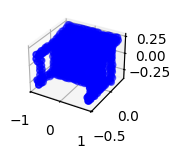

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a new figure for the 3D plot
fig = plt.figure()
ax = fig.add_subplot(321, projection='3d')
points = data[random_int].reshape(1024,3).cpu()
# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o')


# Show the plot
plt.show()


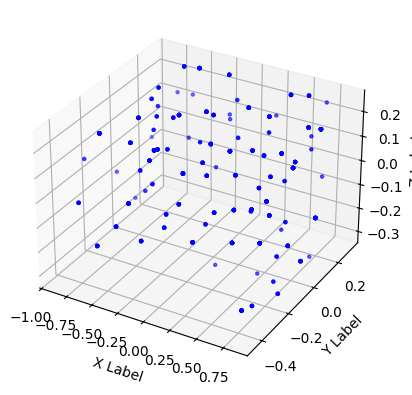

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a new figure for the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
points = jjjj.cpu().detach().numpy()
# Plot the points
# ax.scatter(points[:, 1, 0], 0, 0, c='b', marker='.')

ax.scatter(points[:, 1, 0], points[:, 1, 1], points[:, 1, 2], c='b', marker='.')

# ax.scatter(points[:, 1, 3], points[:, 1, 4], points[:, 1, 5], c='b', marker='o')

# Set labels for the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()


torch.Size([1, 512, 6])


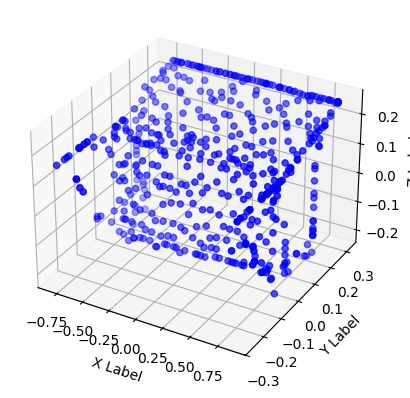

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a new figure for the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
print(pooling_xyz.shape)
points = pooling_xyz.cpu().detach().numpy()
# Plot the points
# ax.scatter(points[0, :, 0], points[0, :, 1], points[0, :, 2], c='b', marker='o')
ax.scatter(points[0, :, 0], points[0, :, 1], points[0, :, 2], c='b', marker='o')

# Set labels for the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()


In [8]:
print(pooling_xyz.cpu().detach().numpy()[:3, :])
print(data[random_int].reshape(1024,3).cpu()[:3, :])

[[[ 0.29143608 -0.00810942  0.13554965  0.17630537 -0.06437255
    0.02327266]
  [-0.81034845  0.16216344 -0.08195161 -0.89255124  0.15126994
   -0.30069265]
  [ 0.84345186 -0.16026707 -0.03210481  0.827474   -0.45193088
   -0.28895658]
  ...
  [ 0.84345186  0.23675422  0.20711319  0.79481006  0.12818556
    0.1443967 ]
  [-0.36348057 -0.0421284  -0.12495929 -0.4737684  -0.06644893
   -0.24521023]
  [-0.51435214  0.3156278   0.24485566 -0.6335737   0.26453438
    0.1922291 ]]]
tensor([[ 0.1763, -0.0644,  0.0233],
        [-0.3530,  0.3050,  0.2422],
        [-0.8361,  0.0440, -0.3081]])


In [9]:
knn_xyz2 = knn_xyz.permute(0, 1, 3, 2)
knn_xyz2 = knn_xyz2.reshape(-1, 6, 90)
pooling_xyz2 = pooling(knn_xyz2)

RuntimeError: shape '[-1, 6, 90]' is invalid for input of size 92160

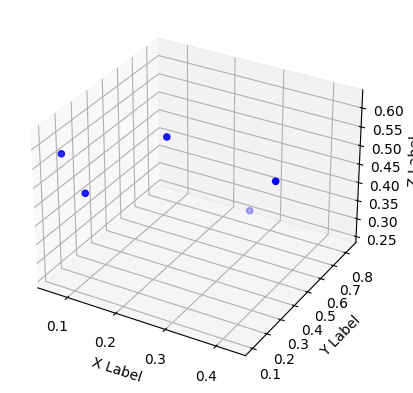

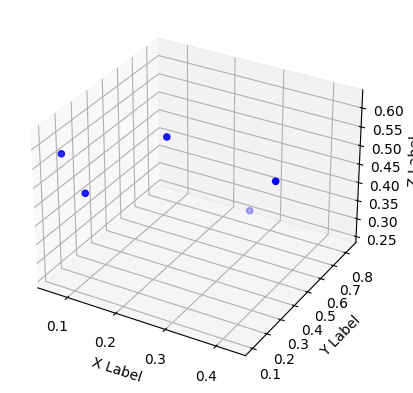

In [ ]:
import torch
a = torch.rand(5, 1, 3)
b = a.repeat(1, 5, 1)
pooling = Pooling(3)
b = pooling(b.permute(0, 2, 1))
c = pooling((a+0).permute(0, 2, 1))
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a new figure for the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
points = c.reshape(5, 3).detach().numpy()
# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o')

# Set labels for the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()

# Create a new figure for the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
points = a.reshape(5, 3).numpy()
# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o')

# Set labels for the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()


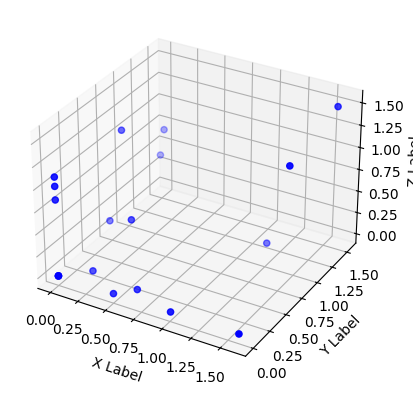

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a new figure for the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
points = b.detach().numpy()
# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o')

# Set labels for the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()


In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

pairwise_distances1 = squareform(pdist(pooling_xyz.permute(1, 0).cpu().detach().numpy()))
pairwise_distances2 = squareform(pdist(pooling_xyz2.permute(1, 0).cpu().detach().numpy()))
print(pairwise_distances1)
print(pairwise_distances2)
print(np.array_equal(pairwise_distances1, pairwise_distances2)) # result: True

[[ 0.         18.32471316 17.61883279 18.17309177 16.92512948 17.84586496]
 [18.32471316  0.         17.09926001 18.09415822 17.43823105 17.84916597]
 [17.61883279 17.09926001  0.         17.05495884 17.42307848 17.49557586]
 [18.17309177 18.09415822 17.05495884  0.         17.76399597 18.92408966]
 [16.92512948 17.43823105 17.42307848 17.76399597  0.         18.50244741]
 [17.84586496 17.84916597 17.49557586 18.92408966 18.50244741  0.        ]]
[[ 0.         14.38617631 16.03918794 21.80252446 17.42045593 17.62299618]
 [14.38617631  0.         15.09955586 18.82004302 20.14034708 18.31146226]
 [16.03918794 15.09955586  0.         19.64764514 16.68659973 21.62021395]
 [21.80252446 18.82004302 19.64764514  0.         17.79595437 18.12013806]
 [17.42045593 20.14034708 16.68659973 17.79595437  0.         19.92533352]
 [17.62299618 18.31146226 21.62021395 18.12013806 19.92533352  0.        ]]
False


In [41]:
pooling_xyz2

tensor([[0.0000, 0.0000, 0.0000, 0.1403, 0.3857, 1.1453],
        [0.0000, 3.2082, 2.7379, 0.6608, 0.0000, 0.0000],
        [0.4307, 0.0000, 1.6808, 0.0000, 1.6959, 0.0000],
        ...,
        [0.7321, 0.0000, 0.1506, 0.0000, 1.1606, 0.0000],
        [0.8271, 0.2965, 0.4835, 0.0000, 0.0000, 0.6511],
        [0.0000, 0.0000, 0.0000, 1.4924, 0.4840, 0.0000]], device='cuda:0',
       grad_fn=<ReluBackward0>)